In [1]:
import pandas as pd
import seaborn as sns

In [2]:
def get_aggregate_analysis(particles, path):
    path_one_battery_of_test = f"{path}rastrigin_nb_particules_{particles}_run"

    all_dfs = []
    for i in range(20):
        current_df = pd.read_csv(f"{path_one_battery_of_test}_{i}.csv")
        current_df["run"] = i
        #current_df["particles"] = particles
        all_dfs.append(current_df)
    concatenated_df = pd.concat(all_dfs)
    #concatenated_df["tours"] = concatenated_df["tours"]//ants
    mean_best_length_per_tours = concatenated_df.groupby("iterations")["best_solution"].mean().reset_index()
    repartition_of_best_length = concatenated_df.groupby("run")["best_solution"].min().reset_index()
    return mean_best_length_per_tours, repartition_of_best_length


def compute_all_analysis(particles_range, path):
    mean_list = []
    min_list = []
    for particles in particles_range:
        mean, min = get_aggregate_analysis(particles, path)
        mean["particles"] = particles
        min["particles"] = particles
        mean_list.append(mean)
        min_list.append(min)
    return {
        "mean": pd.concat(mean_list),
        "min": pd.concat(min_list)
    }

In [3]:
path = f"results/exo_2/"
pso_exo_2 = compute_all_analysis([5,10,20,50], path)

In [4]:
pso_exo_2["mean"]

,iterations,best_solution,particles
0,0,48.892048,5
1,1,21.431984,5
2,2,17.987859,5
3,3,12.105797,5
4,4,8.804236,5
...,...,...,...
46,46,-29.584780,50
47,47,-29.886130,50
48,48,-29.886130,50
49,49,-29.886130,50


In [5]:
sns.set_theme()

[Text(0.5, 1.0, 'Evolution of best solution found accross number of particles')]

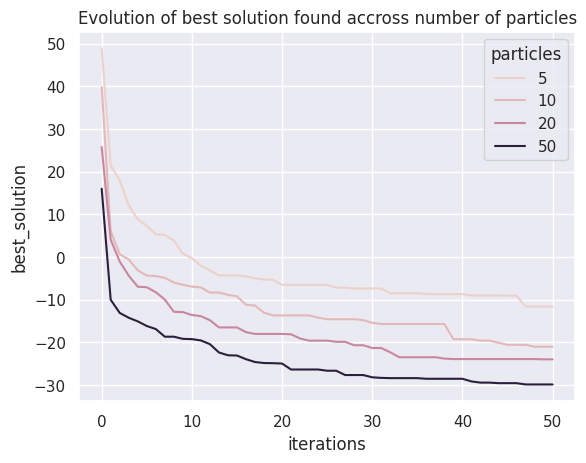

In [6]:
sns.lineplot(data=pso_exo_2["mean"], x="iterations", y="best_solution", hue="particles").set(title="Evolution of best solution found accross number of particles")

We observe that as the number of particles increases, the best solution decreases (and therefore imporves since we are in a minimization problems)

<Axes: xlabel='particles', ylabel='best_solution'>

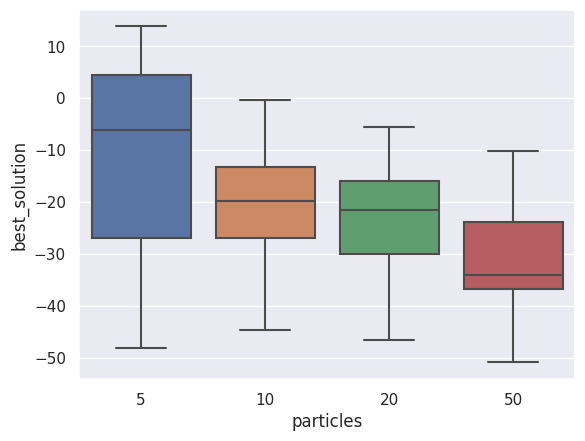

In [7]:
sns.boxplot(
    data=pso_exo_2["min"], x="particles", y="best_solution"
)

While looking at the box plot, we can observe that with 5 particles, our model has high variance, the interquartile range is much higher. On top of that, seen before the best solution median is much higher than the others. 10,20,50 have same interquartile range more or less and the difference between 10 and 20 does not seems significant.
For 50 particles the improve is much better in particular with respect to the median

# Exercice 3

In [8]:
pso_exo_3 = {}

In [10]:
path_gbest = f"results/exo_3/topology_gbest_"
path_wheel= f"results/exo_3/topology_wheel_"
path_ring=  f"results/exo_3/topology_ring_"

pso_exo_3["gbest"] = compute_all_analysis([5,10,20,50], path_gbest)
pso_exo_3["wheel"]= compute_all_analysis([5,10,20,50], path_wheel)
pso_exo_3["ring"]= compute_all_analysis([5,10,20,50], path_ring)

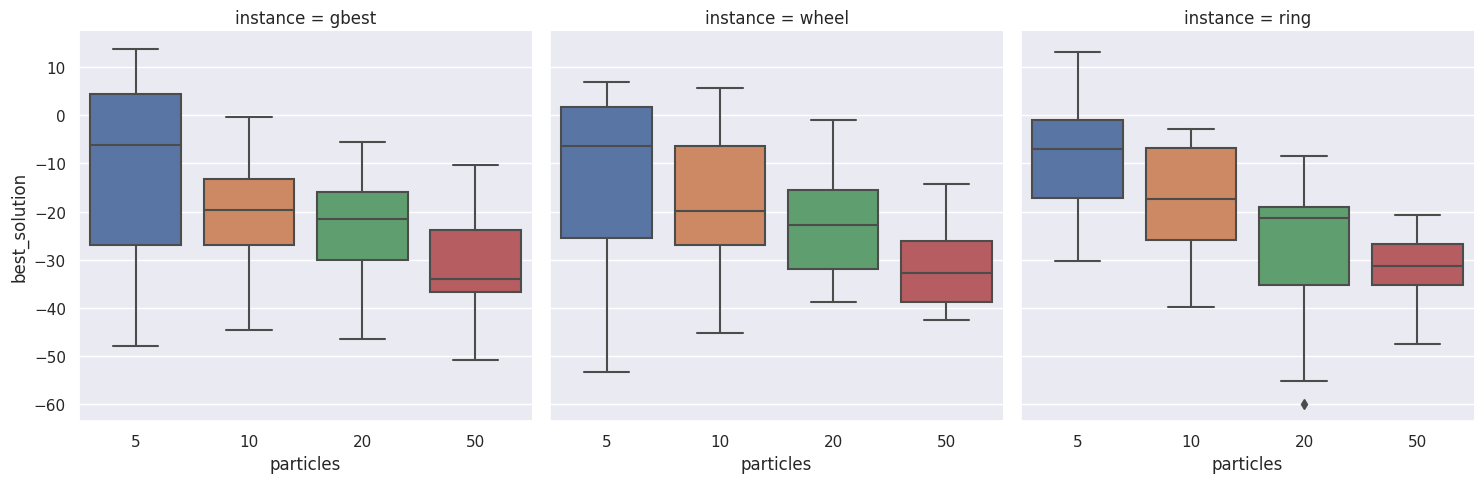

In [12]:
pso_exo_3["gbest"]["min"]["instance"] = "gbest"
pso_exo_3["wheel"]["min"]["instance"] = "wheel"
pso_exo_3["ring"]["min"]["instance"] = "ring"

sns.catplot(
    data=pd.concat([pso_exo_3["gbest"]["min"], pso_exo_3["wheel"]["min"], pso_exo_3["ring"]["min"]]), x="particles", y="best_solution",
    col="instance",
    kind="box", sharey=True
)

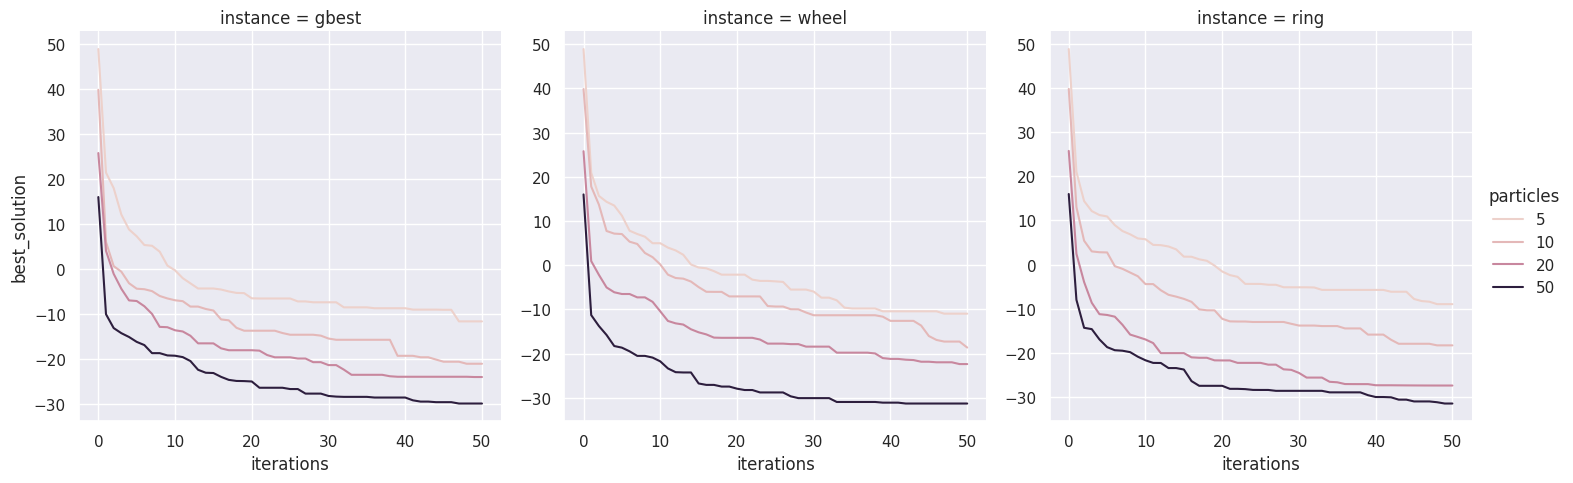

In [16]:
pso_exo_3["gbest"]["mean"]["instance"] = "gbest"
pso_exo_3["wheel"]["mean"]["instance"] = "wheel"
pso_exo_3["ring"]["mean"]["instance"] = "ring"

sns.relplot(pd.concat([pso_exo_3["gbest"]["mean"], pso_exo_3["wheel"]["mean"], pso_exo_3["ring"]["mean"]]), x="iterations", y="best_solution", hue="particles", col="instance", kind="line", facet_kws={'sharey': False, 'sharex': True})

In mean the wheel seems to have much higher difference betweens the the number of particles than for gbest. Ring seems to be same case as for wheel. In Ring the difference between 20 and 50 particles is not  that big.